In [ ]:
"""
There are a number of ways you might improve your text generation models:

Using more data?
You’ll need to consider memory and output size constraints
Also consider using only top-k most common words
Know your data - songs have many more words than a Tweet
Keep tuning your model
Add/subtract from layer sizes or embedding dimensions
Use np.random.choice with the probabilities for more variance in predicted outputs
"""

In [ ]:
###Optimizing the Text Generation Model

#You've already done some amazing work with generating new songs, but so far we've seen some issues with repetition and a fair amount of incoherence.
#By using more data and further tweaking the model, you'll be able to get improved results.
#We'll once again use the Kaggle Song Lyrics Dataset here.

In [1]:
###Import TensorFlow and related functions

import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Other imports for processing data
import string
import numpy as np
import pandas as pd

In [2]:
###Get the Dataset

#As noted above, we'll utilize the Song Lyrics dataset on Kaggle again.

!wget --no-check-certificate \
    https://drive.google.com/uc?id=1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8 \
    -O /tmp/songdata.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
# Read the dataset from csv - just first 10 songs for now
dataset = pd.read_csv('C:/Users/fortn/anaconda3/songdata.csv')

In [ ]:
"""
250 Songs
Now we've seen a model trained on just a small sample of songs, and how this often leads to repetition as you get further along in trying to generate new text.
Let's switch to using the 250 songs instead, and see if our output improves. This will actually be nearly 10K lines of lyrics, which should be sufficient.

Note that we won't use the full dataset here as it will take up quite a bit of RAM and processing time, but you're welcome to try doing so on your own later.
If interested, you'll likely want to use only some of the more common words for the Tokenizer, which will help shrink processing time and memory needed (or else you'd have an output array hundreds of thousands of words long).
"""

In [ ]:
###Preprocessing

In [4]:
def tokenize_corpus(corpus, num_words=-1):
  # Fit a Tokenizer on the corpus
  if num_words > -1:
    tokenizer = Tokenizer(num_words=num_words)
  else:
    tokenizer = Tokenizer()
  tokenizer.fit_on_texts(corpus)
  return tokenizer

def create_lyrics_corpus(dataset, field):
  # Remove all other punctuation
  dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation), '')
  # Make it lowercase
  dataset[field] = dataset[field].str.lower()
  # Make it one long string to split by line
  lyrics = dataset[field].str.cat()
  corpus = lyrics.split('\n')
  # Remove any trailing whitespace
  for l in range(len(corpus)):
    corpus[l] = corpus[l].rstrip()
  # Remove any empty lines
  corpus = [l for l in corpus if l != '']

  return corpus

In [7]:
def tokenize_corpus(corpus, num_words=-1):
  # Fit a Tokenizer on the corpus
  if num_words > -1:
    tokenizer = Tokenizer(num_words=num_words)
  else:
    tokenizer = Tokenizer()
  tokenizer.fit_on_texts(corpus)
  return tokenizer

# Read the dataset from csv - this time with 250 songs
dataset = pd.read_csv('C:/Users/fortn/anaconda3/songdata.csv', dtype=str)[:250]
# Create the corpus using the 'text' column containing lyrics
corpus = create_lyrics_corpus(dataset, 'text')
# Tokenize the corpus
tokenizer = tokenize_corpus(corpus, num_words=2000)
total_words = tokenizer.num_words

# There should be a lot more words now
print(total_words)

<ipython-input-4-fbdddccf8583>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation), '')


2000


In [8]:
###Create Sequences and Labels

sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		sequences.append(n_gram_sequence)

# Pad sequences for equal input length 
max_sequence_len = max([len(seq) for seq in sequences])
sequences = np.array(pad_sequences(sequences, maxlen=max_sequence_len, padding='pre'))

# Split sequences between the "input" sequence and "output" predicted word
input_sequences, labels = sequences[:,:-1], sequences[:,-1]
# One-hot encode the labels
one_hot_labels = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
"""
Train a (Better) Text Generation Model
With more data, we'll cut off after 100 epochs to avoid keeping you here all day.
#You'll also want to change your runtime type to GPU if you haven't already (you'll need to re-run the above cells if you change runtimes).
"""

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(input_sequences, one_hot_labels, epochs=100, verbose=1)

Epoch 1/100
1480/1480 [==============================] - 44s 19ms/step - loss: 6.2311 - accuracy: 0.0404
Epoch 2/100
1480/1480 [==============================] - 28s 19ms/step - loss: 5.6895 - accuracy: 0.0477
Epoch 3/100
1480/1480 [==============================] - 28s 19ms/step - loss: 5.4754 - accuracy: 0.0702
Epoch 4/100
1480/1480 [==============================] - 37s 25ms/step - loss: 5.2980 - accuracy: 0.0919
Epoch 5/100
1480/1480 [==============================] - 34s 23ms/step - loss: 5.1024 - accuracy: 0.1141
Epoch 6/100
1480/1480 [==============================] - 31s 21ms/step - loss: 4.8992 - accuracy: 0.1361
Epoch 7/100
1480/1480 [==============================] - 32s 22ms/step - loss: 4.7278 - accuracy: 0.15500s - loss:
Epoch 8/100
1480/1480 [==============================] - 33s 22ms/step - loss: 4.5808 - accuracy: 0.1679
Epoch 9/100
1480/1480 [==============================] - 35s 24ms/step - loss: 4.4686 - accuracy: 0.17750s - loss:
Epoch 10/100
1480/1480 [===========

1480/1480 [==============================] - 39s 27ms/step - loss: 2.4241 - accuracy: 0.4831
Epoch 91/100
1480/1480 [==============================] - 39s 27ms/step - loss: 2.4017 - accuracy: 0.4844
Epoch 92/100
1480/1480 [==============================] - 43s 29ms/step - loss: 2.4100 - accuracy: 0.4835
Epoch 93/100
1480/1480 [==============================] - 43s 29ms/step - loss: 2.3904 - accuracy: 0.4875
Epoch 94/100
1480/1480 [==============================] - 46s 31ms/step - loss: 2.3733 - accuracy: 0.4885
Epoch 99/100
1480/1480 [==============================] - 46s 31ms/step - loss: 2.3717 - accuracy: 0.4902
Epoch 100/100
1263/1480 [========================>.....] - ETA: 7s - loss: 2.3686 - accuracy: 0.4953

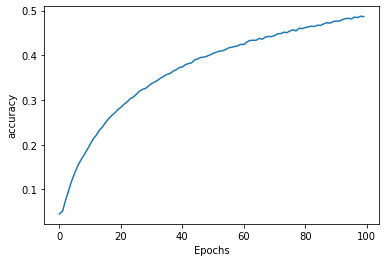

In [10]:
###View the Training Graph

import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

In [ ]:
###Generate better lyrics!
#This time around, we should be able to get a more interesting output with less repetition.

In [11]:
seed_text = "im feeling chills"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

im feeling chills me to the bone on the sky and shining out of your misery famous beams meets beach bliss apple complain girls wonderful teach heavens changed fat adore hero word showing small cotton age knock missing give me the other inside is the same again and you and me jeanie jeanie is until youre gonna take for me im extra fucking wasted i know we get to me jeanie on my head livin like you want to go away from sing the girls around before you shouldnt me jeanie jeanie again for the night is sleep o river before you dance


In [ ]:
"""
Varying the Possible Outputs
In running the above, you may notice that the same seed text will generate similar outputs.
This is because the code is currently always choosing the top predicted class as the next word.
What if you wanted more variance in the output?

Switching from model.predict_classes to model.predict_proba will get us all of the class probabilities.
We can combine this with np.random.choice to select a given predicted output based on a probability, thereby giving a bit more randomness to our outputs.
"""

In [12]:
# Test the method with just the first word after the seed text
seed_text = "im feeling chills"
next_words = 100
  
token_list = tokenizer.texts_to_sequences([seed_text])[0]
token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
predicted_probs = model.predict(token_list)[0]
predicted = np.random.choice([x for x in range(len(predicted_probs))], 
                             p=predicted_probs)
# Running this cell multiple times should get you some variance in output
print(predicted)

16


In [13]:
# Use this process for the full output generation
seed_text = "im feeling chills"
next_words = 100
  
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted_probs = model.predict(token_list)[0]
  predicted = np.random.choice([x for x in range(len(predicted_probs))],
                               p=predicted_probs)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

im feeling chills in your will for him this time but i please me aint no crazy night after long night late changed out that street knew office cutie teach lovelight shoes light back upon the moon shine that beats to blame for no easy that i will love up your mother know i is no more to be your more mans dust too funny call us gee shes fat of judge live prison run sore very parted gotta kin fire for love then you kissed the back to begun that trick now is the park of rock women clouds age mama rocking
